In [223]:
import numpy as np
import matplotlib.pyplot as plt
import x_sites
import importlib
importlib.reload(x_sites)

<module 'x_sites' from '/home/yamamoto/Dropbox/study/ed_hubbard/x_sites.py'>

In [224]:
ops = x_sites.make_local_ops()
cdag = ops['c^+']
c = ops['c^-']
I = ops['I']
F = ops['F']

In [225]:
t = 1.0
U = 4.0
mu = U/2.0
L = 2
Cdag = {}
C = {}
Cdag['u'] = [I, cdag]+[I, I]*(L-1)
Cdag['d'] = [cdag, F]+[I, I]*(L-1)
C['u'] = [I, c]+[I, I]*(L-1)
C['d'] = [c, F]+[I, I]*(L-1)
Cdagi = {}
Ci = {}
Ni = {}
for s in ['u', 'd']:
    Cdagi[s] = []
    Ci[s] = []
    Ni[s] = []
    for i in range(L):
        cdagi = x_sites.make_matrix(
            np.roll(Cdag[s], 2*i, axis=0))
        ci = cdagi.conj().T
        Cdagi[s].append(cdagi)
        Ci[s].append(ci)
        Ni[s].append(cdagi@ci)

In [226]:

t = 1.0
U = 4.0
mu = U/2.0
L = 2
Cdag = {}
C = {}
N = {}
Cdag['u'] = [x_sites.make_matrix(
    [I, I]*i + [I, cdag]+[F, F]*(L-1 - i)) for i in range(L)]
Cdag['d'] = [x_sites.make_matrix(
    [I, I]*i + [cdag, F]+[F, F]*(L-1 - i)) for i in range(L)]
for s in ['u', 'd']:
    C[s] = [Cdag[s][i].conj().T for i in range(L)]
    N[s] = [Cdag[s][i]@C[s][i] for i in range(L)]

In [227]:
hamil = np.zeros((4**L, 4**L))
for i in range(L):
    hamil += U*N['u'][i]@N['d'][i] - mu * \
        (N['d'][i] + N['u'][i])
for s in ['u', 'd']:
    for i in range(L):
        hamil += -t*(Cdag[s][(i+1) % L]@C[s][i])

In [228]:
eigval, eigvec = np.linalg.eigh(hamil)

In [229]:
eigval

array([-4.82842712e+00, -4.00000000e+00, -4.00000000e+00, -4.00000000e+00,
       -3.00000000e+00, -3.00000000e+00, -3.00000000e+00, -3.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -3.18873031e-17,  0.00000000e+00,  0.00000000e+00,  8.28427125e-01])

In [230]:
Ntotal = np.zeros((4**L, 4**L))
for i in range(L):
    Ntotal += N['u'][i] + N['d'][i]
for i in range(4**L):
    print(eigvec[i].conj()@Ntotal@eigvec[i])

3.0
0.9999999999999998
2.0001957781222988
2.707106781186548
0.9999999999999998
1.3072990730436336
1.1392282133608753
2.499804221877702
2.000195778122299
1.139228213360875
1.0000309378615206
2.499999999999998
2.707106781186548
2.499804221877701
2.499999999999999
3.0


In [231]:
omegamesh = 100
omega_min = -10.0
omega_max = 10.0

omegas = [omega_min + (-omega_min + omega_max)*iomega /
          omegamesh for iomega in range(omegamesh)]

In [232]:
Gs = []
for omega in omegas:
    print(omega)
    Gs.append(x_sites.make_PES(eigval, eigvec, Cdagi['d'][0], Ci['d'][0], omega) + x_sites.make_BIS(
        eigval, eigvec, Cdagi['d'][0], Ci['d'][0], omega))

-10.0
-9.8
-9.6
-9.4
-9.2
-9.0
-8.8
-8.6
-8.4
-8.2
-8.0
-7.8
-7.6
-7.4
-7.2
-7.0
-6.8
-6.6
-6.4
-6.2
-6.0
-5.8
-5.6
-5.4
-5.2
-5.0
-4.8
-4.6
-4.4
-4.2
-4.0
-3.8
-3.5999999999999996
-3.4000000000000004
-3.2
-3.0
-2.8
-2.5999999999999996
-2.4000000000000004
-2.2
-2.0
-1.8000000000000007
-1.5999999999999996
-1.4000000000000004
-1.1999999999999993
-1.0
-0.8000000000000007
-0.5999999999999996
-0.40000000000000036
-0.1999999999999993
0.0
0.1999999999999993
0.40000000000000036
0.5999999999999996
0.8000000000000007
1.0
1.1999999999999993
1.4000000000000004
1.5999999999999996
1.8000000000000007
2.0
2.1999999999999993
2.4000000000000004
2.5999999999999996
2.8000000000000007
3.0
3.1999999999999993
3.4000000000000004
3.5999999999999996
3.8000000000000007
4.0
4.199999999999999
4.4
4.6
4.800000000000001
5.0
5.199999999999999
5.4
5.6
5.800000000000001
6.0
6.199999999999999
6.399999999999999
6.600000000000001
6.800000000000001
7.0
7.199999999999999
7.399999999999999
7.600000000000001
7.800000000000001

In [233]:
Gs = np.array(Gs)

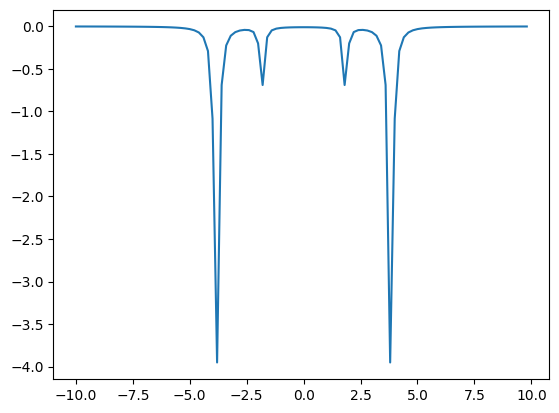

In [234]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(omegas, Gs.imag)

In [235]:
omegas = np.array(omegas)

In [236]:
sigma = omegas + mu - 1/Gs

In [237]:
G_hI = []
k_min = -np.pi
k_max = np.pi
k_mesh = 100
ks = [k_min + (-k_min + k_max)*ik/k_mesh for ik in range(k_mesh)]
for k in ks:
    G_hI.append(1.0/(omegas + mu + np.cos(k) - sigma))

In [238]:
G_hI = np.array(G_hI)
G_hI = G_hI.T

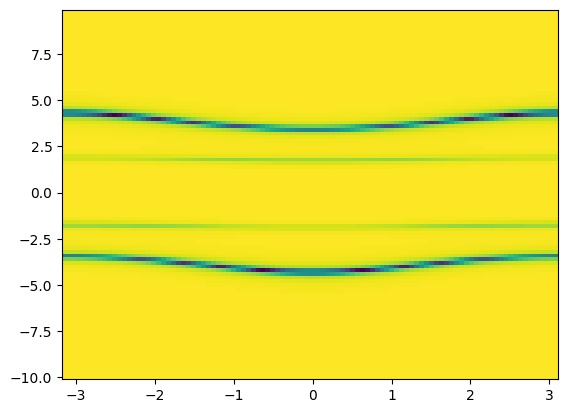

In [239]:
fig = plt.figure()
ax = fig.add_subplot()
X, Y = np.meshgrid(ks, omegas)
ax.pcolormesh(X, Y, G_hI.imag)